In [1]:
# libraries for numerical
import pandas as pd  
import numpy as np

# libraries for visualization
import matplotlib.pyplot as plt  
import seaborn as sns

In [333]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [334]:
train_data.head()

,Unnamed: 0,gender,ethnicity,parental level of education,lunch,test preparation course,reading score,writing score,math score
0,0,male,group C,some college,standard,none,61,62,61
1,1,female,group C,associate's degree,standard,none,62,53,53
2,2,female,group C,some college,free/reduced,completed,75,70,67
3,3,male,group C,some high school,free/reduced,none,76,65,79
4,4,male,group A,high school,free/reduced,none,58,44,53


In [335]:
test_data.head()

,Unnamed: 0,gender,ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,0,female,group C,some college,standard,none,67,72
1,1,male,group E,some college,standard,none,60,59
2,2,female,group C,bachelor's degree,standard,none,93,95
3,3,male,group D,associate's degree,standard,none,48,46
4,4,female,group B,associate's degree,standard,none,76,80


In [336]:
train_data.drop('Unnamed: 0', axis=1, inplace=True)
train_data.head()

,gender,ethnicity,parental level of education,lunch,test preparation course,reading score,writing score,math score
0,male,group C,some college,standard,none,61,62,61
1,female,group C,associate's degree,standard,none,62,53,53
2,female,group C,some college,free/reduced,completed,75,70,67
3,male,group C,some high school,free/reduced,none,76,65,79
4,male,group A,high school,free/reduced,none,58,44,53


In [337]:
test_data.drop('Unnamed: 0', axis=1, inplace=True)
test_data.head()

,gender,ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group C,some college,standard,none,67,72
1,male,group E,some college,standard,none,60,59
2,female,group C,bachelor's degree,standard,none,93,95
3,male,group D,associate's degree,standard,none,48,46
4,female,group B,associate's degree,standard,none,76,80


# Exploratory Data Analysis (EDA) with Categorical Variables

In [269]:
train_data.isnull().sum()

gender                         0
ethnicity                      0
parental level of education    0
lunch                          0
test preparation course        0
reading score                  0
writing score                  0
math score                     0
dtype: int64

In [270]:
### Work with gender column
train_data['gender'].value_counts()

female    367
male      333
Name: gender, dtype: int64

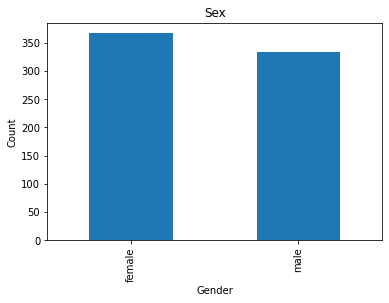

In [271]:
### Display the gender details in the Graph
train_data.gender.value_counts().plot(kind='bar')
plt.title('Sex')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [272]:
gender_score = train_data.groupby('gender')['math score'].value_counts()
gender_score

gender  math score
female  65            22
        69            13
        74            13
        62            12
        63            12
                      ..
male    35             1
        37             1
        41             1
        43             1
        99             1
Name: math score, Length: 137, dtype: int64

In [273]:
### Work with ethnicity column
train_data['ethnicity'].value_counts()

group C    219
group D    184
group B    141
group E     98
group A     58
Name: ethnicity, dtype: int64

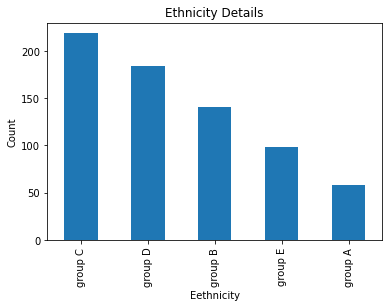

In [274]:
### Display the ethnicity details in the Graph
train_data.ethnicity.value_counts().plot(kind='bar')
plt.title('Ethnicity Details')
plt.xlabel('Eethnicity')
plt.ylabel('Count')
plt.show()

In [275]:
ethnicity_score = train_data.groupby('ethnicity')['math score'].value_counts()
ethnicity_score

ethnicity  math score
group A    53            3
           71            3
           44            2
           45            2
           47            2
                        ..
group E    82            1
           85            1
           88            1
           89            1
           91            1
Name: math score, Length: 257, dtype: int64

In [276]:
### Work with parental level of education column
train_data['parental level of education'].value_counts()

some college          175
associate's degree    138
high school           134
some high school      129
bachelor's degree      81
master's degree        43
Name: parental level of education, dtype: int64

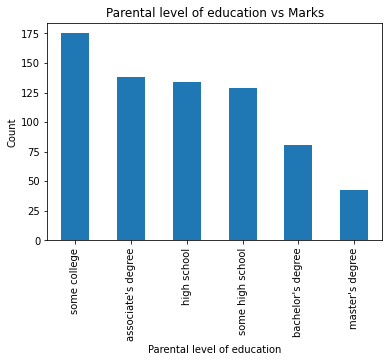

In [277]:
### Display the ethnicity details in the Graph
train_data['parental level of education'].value_counts().plot(kind='bar')
plt.title('Parental level of education vs Marks')
plt.xlabel('Parental level of education')
plt.ylabel('Count')
plt.show()

In [278]:
### Work with Lunch column
train_data['lunch'].value_counts()

standard        454
free/reduced    246
Name: lunch, dtype: int64

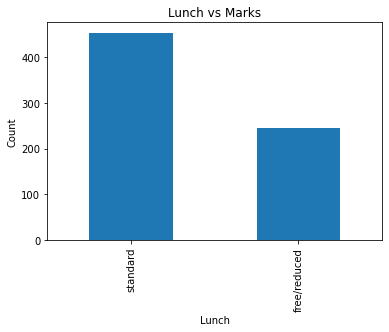

In [279]:
### Display the Lunch details in the Graph
train_data['lunch'].value_counts().plot(kind='bar')
plt.title('Lunch vs Marks')
plt.xlabel('Lunch')
plt.ylabel('Count')
plt.show()

In [280]:
### Work with Lunch column
train_data['test preparation course'].value_counts()

none         456
completed    244
Name: test preparation course, dtype: int64

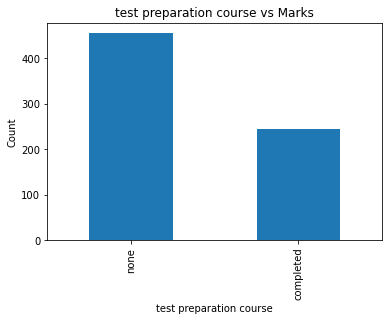

In [281]:
### Display the Lunch details in the Graph
train_data['test preparation course'].value_counts().plot(kind='bar')
plt.title('test preparation course vs Marks')
plt.xlabel('test preparation course')
plt.ylabel('Count')
plt.show()

### Apply LabelEncoder

In [338]:
from sklearn.preprocessing import LabelEncoder

In [339]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       700 non-null    object
 1   ethnicity                    700 non-null    object
 2   parental level of education  700 non-null    object
 3   lunch                        700 non-null    object
 4   test preparation course      700 non-null    object
 5   reading score                700 non-null    int64 
 6   writing score                700 non-null    int64 
 7   math score                   700 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 43.9+ KB


In [243]:
## Drop the unwanted features
train_data.drop(['gender', 'ethnicity','lunch', 'writing score', 'reading score'], axis=1, inplace=True)
test_data.drop(['gender', 'ethnicity','lunch', 'writing score', 'reading score'], axis=1, inplace=True)

In [340]:
le = LabelEncoder()

### Apply label encoding on Gender Column
train_data['gender']= le.fit_transform(train_data['gender'])
test_data['gender']= le.fit_transform(test_data['gender'])

### Apply label encoding on Ethinicity Column
train_data['ethnicity']= le.fit_transform(train_data['ethnicity'])
test_data['ethnicity']= le.fit_transform(test_data['ethnicity'])

### Apply label encoding on parental level of education Column
train_data['parental level of education']= le.fit_transform(train_data['parental level of education'])
test_data['parental level of education']= le.fit_transform(test_data['parental level of education'])

### Apply label encoding on lunch Column
train_data['lunch']= le.fit_transform(train_data['lunch'])
test_data['lunch']= le.fit_transform(test_data['lunch'])

### Apply label encoding on test preparation course Column
train_data['test preparation course']= le.fit_transform(train_data['test preparation course'])
test_data['test preparation course']= le.fit_transform(test_data['test preparation course'])

In [341]:
train_data.head()

,gender,ethnicity,parental level of education,lunch,test preparation course,reading score,writing score,math score
0,1,2,4,1,1,61,62,61
1,0,2,0,1,1,62,53,53
2,0,2,4,0,0,75,70,67
3,1,2,5,0,1,76,65,79
4,1,0,2,0,1,58,44,53


In [342]:
test_data.head()

,gender,ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,0,2,4,1,1,67,72
1,1,4,4,1,1,60,59
2,0,2,1,1,1,93,95
3,1,3,0,1,1,48,46
4,0,1,0,1,1,76,80


In [304]:
train_data.drop(['reading score', 'writing score'], axis=1, inplace=True)
test_data.drop(['reading score', 'writing score'], axis=1, inplace=True)

### Split the Train and Test dataset

In [343]:
# libraries for machine learning
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, r2_score, f1_score
from sklearn import metrics

In [344]:
X = train_data.drop(['math score'], axis=1)
y = train_data['math score']

In [345]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [346]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
x_train = scaler.fit_transform(X_train) 
x_test = scaler.transform(X_test)

In [347]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(criterion='gini', n_estimators=27)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=27)

In [348]:
model.score(X_test, y_test)

0.06666666666666667

In [349]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from catboost import CatBoostClassifier
import math

In [350]:
models = {'LR' : LogisticRegression(),
'DTC' : DecisionTreeClassifier(),
'SVC': SVC(),
'KNN': KNeighborsClassifier(),
'RF' : RandomForestClassifier(),
'GNB': GaussianNB(),
'CBC': CatBoostClassifier()}

In [351]:
def models_perfomance(X_train,X_test,y_train,y_test):
    results = {}
    for name, model in models.items():
        model.fit(X_train,y_train)
        rmse = math.sqrt(mean_squared_error(y_test,model.predict(X_test), squared= False))
        results[name] = rmse
    
    return results

In [352]:
models_perfomance(X_train,X_test,y_train,y_test)

C:\Users\Dell\anaconda3\envs\ml_projects\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Learning rate set to 0.0763
0:	learn: 4.2535500	total: 39ms	remaining: 39s
1:	learn: 4.2235686	total: 68ms	remaining: 33.9s
2:	learn: 4.1919390	total: 95.6ms	remaining: 31.8s
3:	learn: 4.1636448	total: 128ms	remaining: 31.8s
4:	learn: 4.1347811	total: 156ms	remaining: 31.1s
5:	learn: 4.1031227	total: 185ms	remaining: 30.7s
6:	learn: 4.0731409	total: 220ms	remaining: 31.2s
7:	learn: 4.0373355	total: 252ms	remaining: 31.3s
8:	learn: 4.0069425	total: 282ms	remaining: 31.1s
9:	learn: 3.9776342	total: 311ms	remaining: 30.8s
10:	learn: 3.9483971	total: 341ms	remaining: 30.7s
11:	learn: 3.9186030	total: 380ms	remaining: 31.3s
12:	learn: 3.8877669	total: 455ms	remaining: 34.6s
13:	learn: 3.8615435	total: 493ms	remaining: 34.7s
14:	learn: 3.8332746	total: 523ms	remaining: 34.3s
15:	learn: 3.8065219	total: 553ms	remaining: 34s
16:	learn: 3.7799303	total: 587ms	remaining: 34s
17:	learn: 3.7542173	total: 624ms	remaining: 34s
18:	learn: 3.7286982	total: 654ms	remaining: 33.8s
19:	learn: 3.7082956	t

164:	learn: 1.7817719	total: 5.46s	remaining: 27.7s
165:	learn: 1.7745546	total: 5.51s	remaining: 27.7s
166:	learn: 1.7666517	total: 5.56s	remaining: 27.7s
167:	learn: 1.7597684	total: 5.6s	remaining: 27.7s
168:	learn: 1.7532442	total: 5.64s	remaining: 27.7s
169:	learn: 1.7474536	total: 5.67s	remaining: 27.7s
170:	learn: 1.7426531	total: 5.72s	remaining: 27.8s
171:	learn: 1.7349749	total: 5.77s	remaining: 27.8s
172:	learn: 1.7306903	total: 5.81s	remaining: 27.8s
173:	learn: 1.7246169	total: 5.85s	remaining: 27.8s
174:	learn: 1.7180737	total: 5.9s	remaining: 27.8s
175:	learn: 1.7102903	total: 5.94s	remaining: 27.8s
176:	learn: 1.7040521	total: 5.97s	remaining: 27.8s
177:	learn: 1.6965126	total: 6.01s	remaining: 27.7s
178:	learn: 1.6900976	total: 6.04s	remaining: 27.7s
179:	learn: 1.6836974	total: 6.08s	remaining: 27.7s
180:	learn: 1.6750566	total: 6.12s	remaining: 27.7s
181:	learn: 1.6678205	total: 6.16s	remaining: 27.7s
182:	learn: 1.6618494	total: 6.19s	remaining: 27.6s
183:	learn: 1.

326:	learn: 1.0473551	total: 10.9s	remaining: 22.5s
327:	learn: 1.0444393	total: 11s	remaining: 22.5s
328:	learn: 1.0411282	total: 11s	remaining: 22.5s
329:	learn: 1.0379114	total: 11s	remaining: 22.4s
330:	learn: 1.0359035	total: 11.1s	remaining: 22.4s
331:	learn: 1.0332358	total: 11.1s	remaining: 22.3s
332:	learn: 1.0306656	total: 11.1s	remaining: 22.3s
333:	learn: 1.0278095	total: 11.2s	remaining: 22.2s
334:	learn: 1.0244341	total: 11.2s	remaining: 22.2s
335:	learn: 1.0212263	total: 11.2s	remaining: 22.2s
336:	learn: 1.0191745	total: 11.3s	remaining: 22.1s
337:	learn: 1.0168088	total: 11.3s	remaining: 22.1s
338:	learn: 1.0133628	total: 11.3s	remaining: 22.1s
339:	learn: 1.0097115	total: 11.3s	remaining: 22s
340:	learn: 1.0079155	total: 11.4s	remaining: 22s
341:	learn: 1.0046945	total: 11.4s	remaining: 22s
342:	learn: 1.0029194	total: 11.4s	remaining: 21.9s
343:	learn: 1.0000219	total: 11.5s	remaining: 21.9s
344:	learn: 0.9971100	total: 11.5s	remaining: 21.8s
345:	learn: 0.9953530	to

488:	learn: 0.6897362	total: 16.3s	remaining: 17s
489:	learn: 0.6879294	total: 16.3s	remaining: 17s
490:	learn: 0.6862388	total: 16.4s	remaining: 17s
491:	learn: 0.6854823	total: 16.4s	remaining: 16.9s
492:	learn: 0.6836803	total: 16.4s	remaining: 16.9s
493:	learn: 0.6820950	total: 16.5s	remaining: 16.9s
494:	learn: 0.6811334	total: 16.5s	remaining: 16.8s
495:	learn: 0.6788792	total: 16.5s	remaining: 16.8s
496:	learn: 0.6782340	total: 16.6s	remaining: 16.8s
497:	learn: 0.6775281	total: 16.6s	remaining: 16.7s
498:	learn: 0.6755372	total: 16.6s	remaining: 16.7s
499:	learn: 0.6743773	total: 16.7s	remaining: 16.7s
500:	learn: 0.6723215	total: 16.7s	remaining: 16.6s
501:	learn: 0.6705450	total: 16.7s	remaining: 16.6s
502:	learn: 0.6687840	total: 16.8s	remaining: 16.6s
503:	learn: 0.6675829	total: 16.8s	remaining: 16.5s
504:	learn: 0.6659740	total: 16.8s	remaining: 16.5s
505:	learn: 0.6644662	total: 16.8s	remaining: 16.4s
506:	learn: 0.6636185	total: 16.9s	remaining: 16.4s
507:	learn: 0.6620

647:	learn: 0.4943647	total: 22s	remaining: 12s
648:	learn: 0.4933338	total: 22.1s	remaining: 11.9s
649:	learn: 0.4921794	total: 22.1s	remaining: 11.9s
650:	learn: 0.4916692	total: 22.1s	remaining: 11.9s
651:	learn: 0.4909459	total: 22.2s	remaining: 11.8s
652:	learn: 0.4904441	total: 22.2s	remaining: 11.8s
653:	learn: 0.4895729	total: 22.3s	remaining: 11.8s
654:	learn: 0.4886666	total: 22.3s	remaining: 11.8s
655:	learn: 0.4874331	total: 22.3s	remaining: 11.7s
656:	learn: 0.4862439	total: 22.4s	remaining: 11.7s
657:	learn: 0.4857558	total: 22.4s	remaining: 11.7s
658:	learn: 0.4850544	total: 22.5s	remaining: 11.6s
659:	learn: 0.4839971	total: 22.5s	remaining: 11.6s
660:	learn: 0.4829926	total: 22.5s	remaining: 11.6s
661:	learn: 0.4824936	total: 22.6s	remaining: 11.5s
662:	learn: 0.4814335	total: 22.6s	remaining: 11.5s
663:	learn: 0.4800506	total: 22.6s	remaining: 11.5s
664:	learn: 0.4790010	total: 22.7s	remaining: 11.4s
665:	learn: 0.4780660	total: 22.7s	remaining: 11.4s
666:	learn: 0.47

808:	learn: 0.3813304	total: 28.2s	remaining: 6.66s
809:	learn: 0.3808276	total: 28.3s	remaining: 6.63s
810:	learn: 0.3801635	total: 28.3s	remaining: 6.59s
811:	learn: 0.3794986	total: 28.3s	remaining: 6.56s
812:	learn: 0.3788849	total: 28.4s	remaining: 6.52s
813:	learn: 0.3783613	total: 28.4s	remaining: 6.49s
814:	learn: 0.3778662	total: 28.4s	remaining: 6.45s
815:	learn: 0.3771039	total: 28.5s	remaining: 6.42s
816:	learn: 0.3763781	total: 28.5s	remaining: 6.38s
817:	learn: 0.3756923	total: 28.5s	remaining: 6.35s
818:	learn: 0.3752971	total: 28.6s	remaining: 6.31s
819:	learn: 0.3747143	total: 28.6s	remaining: 6.28s
820:	learn: 0.3742409	total: 28.6s	remaining: 6.24s
821:	learn: 0.3736417	total: 28.7s	remaining: 6.21s
822:	learn: 0.3729127	total: 28.7s	remaining: 6.17s
823:	learn: 0.3721609	total: 28.7s	remaining: 6.14s
824:	learn: 0.3716900	total: 28.8s	remaining: 6.1s
825:	learn: 0.3710247	total: 28.8s	remaining: 6.07s
826:	learn: 0.3706157	total: 28.8s	remaining: 6.03s
827:	learn: 0

968:	learn: 0.3071641	total: 34.3s	remaining: 1.1s
969:	learn: 0.3068504	total: 34.3s	remaining: 1.06s
970:	learn: 0.3066065	total: 34.4s	remaining: 1.03s
971:	learn: 0.3062586	total: 34.4s	remaining: 991ms
972:	learn: 0.3059585	total: 34.4s	remaining: 955ms
973:	learn: 0.3056782	total: 34.5s	remaining: 921ms
974:	learn: 0.3053739	total: 34.5s	remaining: 886ms
975:	learn: 0.3049179	total: 34.6s	remaining: 851ms
976:	learn: 0.3046215	total: 34.6s	remaining: 815ms
977:	learn: 0.3040965	total: 34.7s	remaining: 780ms
978:	learn: 0.3039504	total: 34.7s	remaining: 744ms
979:	learn: 0.3035226	total: 34.7s	remaining: 709ms
980:	learn: 0.3029908	total: 34.8s	remaining: 673ms
981:	learn: 0.3025328	total: 34.8s	remaining: 638ms
982:	learn: 0.3020292	total: 34.8s	remaining: 602ms
983:	learn: 0.3015563	total: 34.9s	remaining: 567ms
984:	learn: 0.3012663	total: 34.9s	remaining: 531ms
985:	learn: 0.3011122	total: 34.9s	remaining: 496ms
986:	learn: 0.3009320	total: 35s	remaining: 461ms
987:	learn: 0.3

{'LR': 4.015074540276851,
 'DTC': 2.8757352896970154,
 'SVC': 3.7983531949603218,
 'KNN': 3.524342262296003,
 'RF': 2.8332550634893696,
 'GNB': 3.9336539614460215,
 'CBC': 2.953423869544937}

In [353]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [354]:
model.score(X_test, y_test)

0.07142857142857142

In [355]:
prediction = model.predict(X_test)
prediction

array([ 58,  57,  89,  71,  49,  50,  99,  75,  81,  67,  57,  63,  67,
        47,  66,  69,  50,  47,  66,  80,  94,  86,  65,  50,  87,  55,
        58,  65,  70,  53,  52,  62,  58,  61,  86,  85,  66,  66,  62,
        47,  87,  70,  78,  59,  65,  57,  49,  74,  54,  61,  69,  51,
        61,  64,  76,  74,  93,  75,  51,  58,  50,  57,  82,  59,  99,
        62,  74,  79,  94,  82,  81,  58,  78,  88,  62,  63,  68,  62,
        71,  70,  87,  63,  55,  75,  67,  65,  88,  55,  55,  53,  53,
        73,  38,  69,  80,  87,  49,  68,  87,  30,  79,  60,  66,  71,
        89,  53,  53,  70,  62,  71,  75,  63,  92,  58,  50,  47, 100,
        74,  75,  81,  53,  65,  85,  41,  65,  88,  73,  62,  53,  66,
        74,  75,  96,  76,  56,  52,  58,  61,  32,  55,  62,  35,  58,
        67,  53,  69,  54,  97,  62,  81,  69,  58,  64,  50,  18,  89,
        67,  40,  58,  81,  53,  63,  68,  62,  58,  63,  59,  99,  79,
        50,  87,  75,  79,  74,  63,  49,  59,  77,  52,  89,  8

In [356]:
prediction = model.predict(test_data)
prediction

array([62, 69, 85, 45, 71, 81, 63, 71, 84, 68, 79, 58, 67, 94, 42, 58, 71,
       78, 58, 58, 69, 70, 65, 71, 51, 44, 41, 47, 50, 44, 53, 57, 70, 48,
       83, 74, 71, 70, 69, 73, 63, 47, 65, 50, 53, 80, 53, 62, 71, 58, 52,
       63, 68, 84, 71, 76, 62, 66, 79, 93, 75, 71, 65, 50, 79, 53, 63, 81,
       62, 67, 85, 52, 65, 41, 49, 65, 67, 82, 47, 70, 60, 57, 71, 79, 53,
       51, 48, 75, 70, 65, 81, 88, 76, 94, 75, 32, 58, 52, 35, 81, 70, 45,
       65, 71, 80, 66, 81, 55, 54, 48, 68, 41, 70, 63, 50, 91, 59, 66, 64,
       50, 55, 53, 48, 79, 82, 69, 63, 42, 74, 50, 69, 64, 77, 92, 55, 69,
       63, 77, 39, 85, 77, 79, 65, 80, 30, 69, 84, 66, 77, 73, 54, 81, 62,
       69, 48, 50, 53, 50, 83, 66, 53, 76, 84, 58, 71, 81, 63, 55, 74, 58,
       65, 63, 33, 65, 70, 60, 73, 61, 80, 59, 58, 61, 71, 73, 62, 52, 62,
       65, 53, 77, 96, 55, 83, 63, 81, 56, 73, 77, 82, 89, 68, 53, 49, 86,
       76, 75, 68, 48, 81, 50, 79, 50, 75, 58, 62, 62, 67, 76, 53, 65, 58,
       84, 81, 55, 70, 82

In [357]:
# Submission
submission = pd.DataFrame({'idx': test_data.index, 'math_score': prediction})
submission.to_csv('output.csv', index=False)

In [86]:
result = pd.read_csv('output.csv')
result.head()

,idx,math_score
0,0,63
1,1,69
2,2,85
3,3,40
4,4,65


In [174]:
model = CatBoostClassifier(iterations=300, max_depth=9)
model.fit(X_train, y_train)
model.score(X_test, y_test)

Learning rate set to 0.211488
0:	learn: 4.2548117	total: 58.7ms	remaining: 17.6s
1:	learn: 4.1705456	total: 112ms	remaining: 16.7s
2:	learn: 4.0963569	total: 316ms	remaining: 31.3s
3:	learn: 4.0274771	total: 372ms	remaining: 27.5s
4:	learn: 3.9562710	total: 422ms	remaining: 24.9s
5:	learn: 3.8888506	total: 634ms	remaining: 31.1s
6:	learn: 3.8524982	total: 645ms	remaining: 27s
7:	learn: 3.7892576	total: 858ms	remaining: 31.3s
8:	learn: 3.7238704	total: 1.14s	remaining: 37s
9:	learn: 3.6668761	total: 1.35s	remaining: 39.2s
10:	learn: 3.6107742	total: 1.6s	remaining: 42s
11:	learn: 3.5578493	total: 1.84s	remaining: 44.2s
12:	learn: 3.5025628	total: 2.11s	remaining: 46.6s
13:	learn: 3.4627319	total: 2.14s	remaining: 43.8s
14:	learn: 3.4115828	total: 2.36s	remaining: 44.9s
15:	learn: 3.3623899	total: 2.56s	remaining: 45.5s
16:	learn: 3.3203544	total: 2.58s	remaining: 42.9s
17:	learn: 3.2727318	total: 2.79s	remaining: 43.8s
18:	learn: 3.2271627	total: 3.01s	remaining: 44.5s
19:	learn: 3.1828

161:	learn: 1.1617637	total: 35s	remaining: 29.8s
162:	learn: 1.1538222	total: 35.3s	remaining: 29.6s
163:	learn: 1.1487778	total: 35.5s	remaining: 29.5s
164:	learn: 1.1433700	total: 35.8s	remaining: 29.3s
165:	learn: 1.1408354	total: 35.8s	remaining: 28.9s
166:	learn: 1.1357129	total: 36s	remaining: 28.7s
167:	learn: 1.1276541	total: 36.3s	remaining: 28.5s
168:	learn: 1.1205047	total: 36.5s	remaining: 28.3s
169:	learn: 1.1164966	total: 36.8s	remaining: 28.1s
170:	learn: 1.1103794	total: 37s	remaining: 27.9s
171:	learn: 1.1027931	total: 37.2s	remaining: 27.7s
172:	learn: 1.0968344	total: 37.5s	remaining: 27.5s
173:	learn: 1.0884357	total: 37.7s	remaining: 27.3s
174:	learn: 1.0811559	total: 38s	remaining: 27.1s
175:	learn: 1.0748861	total: 38.3s	remaining: 27s
176:	learn: 1.0690378	total: 38.5s	remaining: 26.8s
177:	learn: 1.0643337	total: 38.7s	remaining: 26.6s
178:	learn: 1.0575945	total: 39s	remaining: 26.4s
179:	learn: 1.0533830	total: 39.2s	remaining: 26.2s
180:	learn: 1.0498940	to

0.047619047619047616

In [169]:
prediction = model.predict(X_test)
prediction = prediction.flatten()
prediction

array([ 62,  45,  78,  51,  44,  70,  48,  62,  79,  82,  37,  75,  70,
        74,  61,  63,  92,  80,  51,  52,  68,  76,  74,  62,  64,  75,
        74,  80,  48,  62,  44,  80,  62,  59,  87,  50,  66,  52,  80,
        39,  79,  44,  66,  77,  60,  88,  69,  49,  71,  98,  48,  75,
        63,  44, 100,  77,  73,  81,  56,  47,  88,  74, 100,  37,  74,
        78,  63,  72,  65,  87,  68,  51,  64,  80,  70,  74,  73,  80,
        60,  61,  73,  66,  93,  80,  48,  87,  58,  94,  62,  74,  48,
        75,  77,  65,  88,  71,  70,  67,  65,  68,  63,  73,  57,  59,
        65,  66,  69,  77,  68,  41,  77,  65,  37,  62,  79,  70,  81,
        65,  71,  55,  74,  64,  63,  57,  74,  60,  54,  65,  68,  62,
        69,  69,  74,  47,  52,  66,  63,  75,  86,  48,  61,  58,  56,
        71,  59,  53,  64,  62,  71,  47,  65,  73,  94,  68,  80,  82,
        45,  58,  68,  88,  68,  63,  53,  71,  48,  63,  37,  74,  61,
        77,  73,  65,  51,  55,  48,  44,  59,  57,  85,  79,  6

In [170]:
cb_prediction = model.predict(test_data)
cb_prediction = cb_prediction.flatten()
cb_prediction

array([ 69,  61,  78,  47,  80, 100,  52,  66,  84,  74,  88,  69,  90,
        79,  58,  62,  58,  75,  58,  58,  69,  88,  88,  78,  47,  65,
        22,  44,  52,  44,  48,  57,  70,  48,  68,  74,  65,  74,  70,
        73,  63,  37,  57,  63,  40,  73,  72,  64,  63,  58,  57,  74,
        62,  77,  84,  52,  62,  73,  73,  91,  65,  77,  86,  40,  79,
        64,  75,  73,  62,  61,  80,  63,  75,  47,  49,  70,  83,  89,
        41,  73,  66,  57,  91,  65,  47,  47,  45,  79,  80,  65,  80,
        88,  71,  61,  78,  18,  58,  65,  59,  85,  50,  37,  81,  78,
        59,  80,  69,  51,  61,  58,  57,  41,  57,  69,  50,  75,  54,
        65,  58,  61,  48,  48,  44,  67,  82,  69,  74,  58,  65,  41,
        84,  61,  80, 100,  32,  63,  63,  71,  43,  98,  52,  75,  84,
        80,  29,  56,  84,  62,  75,  73,  37,  81,  63,  69,  44,  55,
        53,  58,  87,  43,  76,  75,  84,  47,  71,  80,  64,  82,  70,
        56,  68,  59,  41,  78,  65,  63,  79,  71,  65,  18,  5

In [171]:
# Submission
submission = pd.DataFrame({'idx': test_data.index, 'math_score': rf_clf_prediction})
submission.to_csv('output.csv', index=False)

In [95]:
### Manual Hyperparameter Tuning
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
model=RandomForestClassifier(n_estimators=300,criterion='entropy',
                             max_features='sqrt',min_samples_leaf=10,random_state=100).fit(X_train,y_train)
predictions=model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))
print(classification_report(y_test,predictions))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]]
0.07407407407407407
              precision    recall  f1-score   support

          29       0.00      0.00      0.00         1
          32       0.00      0.00      0.00         1
          35       0.00      0.00      0.00         2
          41       0.33      1.00      0.50         1
          42       0.00      0.00      0.00         1
          44       0.00      0.00      0.00         3
          45       0.00      0.00      0.00         1
          46       0.00      0.00      0.00         1
          47       0.00      0.00      0.00         2
          48       0.00      0.00      0.00         3
          49       0.20      0.17      0.18         6
          50       0.50      0.33      0.40         3
          51       0.00      0.00      0.00         1
          52       0.00      0.00      0.00         2
          53       0.06      0.33      0.10      

C:\Users\Dell\anaconda3\envs\ml_projects\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\envs\ml_projects\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [96]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [3, 6, 9, 12]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 4, 7, 10, 13]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [100, 325, 550, 775, 1000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [3, 6, 9, 12], 'min_samples_leaf': [1, 4, 7, 10, 13], 'criterion': ['entropy', 'gini']}


In [97]:
rf = RandomForestClassifier()
rf_randomcv = RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\Dell\anaconda3\envs\ml_projects\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   35.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  3.0min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 4, 7, 10, 13],
                                        'min_samples_split': [3, 6, 9, 12],
                                        'n_estimators': [100, 325, 550, 775,
                                                         1000]},
                   random_state=100, verbose=2)

In [98]:
 rf_randomcv.best_params_

{'n_estimators': 100,
 'min_samples_split': 12,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 670,
 'criterion': 'gini'}

In [99]:
rf_randomcv

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 4, 7, 10, 13],
                                        'min_samples_split': [3, 6, 9, 12],
                                        'n_estimators': [100, 325, 550, 775,
                                                         1000]},
                   random_state=100, verbose=2)

In [100]:
best_random_grid=rf_randomcv.best_estimator_

In [101]:
best_random_grid

RandomForestClassifier(max_depth=670, max_features='sqrt', min_samples_split=12)

In [102]:
from sklearn.metrics import accuracy_score
y_pred=best_random_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]]
Accuracy Score 0.06349206349206349
Classification report:               precision    recall  f1-score   support

          29       0.00      0.00      0.00         1
          32       0.00      0.00      0.00         1
          35       0.00      0.00      0.00         2
          36       0.00      0.00      0.00         0
          37       0.00      0.00      0.00         0
          40       0.00      0.00      0.00         0
          41       0.50      1.00      0.67         1
          42       0.00      0.00      0.00         1
          44       0.00      0.00      0.00         3
          45       0.00      0.00      0.00         1
          46       0.00      0.00      0.00         1
          47       0.00      0.00      0.00         2
          48       0.33      0.33      0.33         3
          49       0.33      0.17      0.22         6
          5

C:\Users\Dell\anaconda3\envs\ml_projects\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\envs\ml_projects\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [103]:
best_random_grid.score(X_test, y_test)

0.06349206349206349

In [104]:
y_pred = best_random_grid.predict(test_data)
y_pred

array([ 62,  68,  85,  53,  65,  82,  62,  74,  84,  65,  88,  52,  65,
        91,  49,  58,  71,  78,  54,  58,  75,  88,  65,  75,  51,  44,
        22,  48,  52,  44,  47,  52,  71,  48,  68,  65,  65,  65,  65,
        73,  65,  43,  65,  43,  53,  88,  48,  62,  71,  58,  52,  65,
        68,  99,  71,  62,  62,  66,  88,  99,  75,  71,  65,  52,  79,
        52,  61,  88,  62,  61,  85,  43,  74,  41,  66,  59,  74,  84,
        53,  54,  62,  65,  74,  65,  64,  47,  54,  80,  74,  65,  88,
        88,  76,  94,  88,  32,  58,  52,  49,  86,  71,  53,  65,  65,
        76,  65,  81,  62,  75,  50,  52,  41,  71,  65,  49,  87,  58,
        65,  58,  62,  51,  53,  49,  79,  81,  65,  65,  49,  88,  39,
        79,  61,  75, 100,  39,  66,  63,  71,  53,  85,  69,  75,  65,
        80,  35,  56,  79,  71,  67,  69,  54,  79,  65,  74,  48,  43,
        53,  43,  74,  71,  57,  74,  80,  58,  71,  80,  65,  55,  61,
        51,  68,  63,  41,  65,  65,  53,  70,  62,  80,  53,  5

In [106]:
# Submission
submission = pd.DataFrame({'idx': test_data.index, 'math_score': y_pred})
submission.to_csv('output.csv', index=False)